In [188]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
import random

In [189]:
np.random.seed(0)

In [190]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [191]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

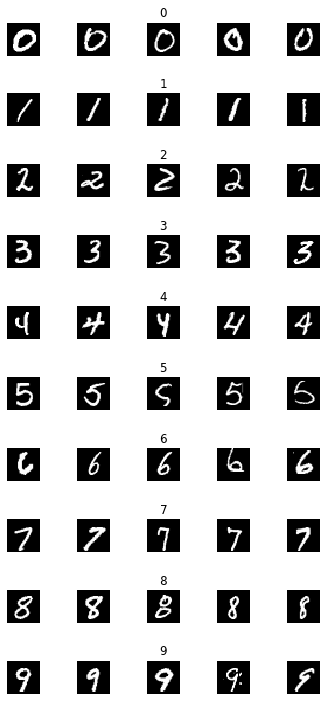

In [192]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


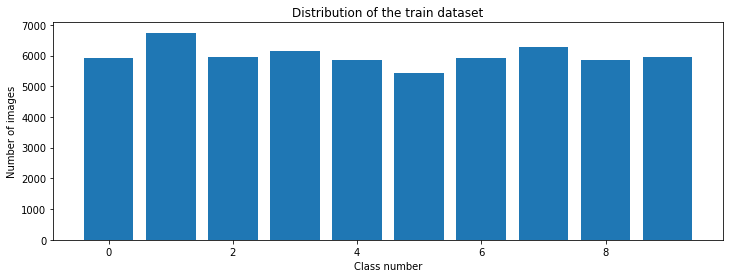

In [193]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [194]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [195]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [196]:
X_train = X_train/255
X_test = X_test/255

In [197]:
# Define the LeNET model function
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [198]:
model = leNet_model()
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 375)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 500)               188000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)             

In [199]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 14s 265us/step - loss: 0.2262 - accuracy: 0.9269 - val_loss: 0.0521 - val_accuracy: 0.9838
Epoch 2/10
54000/54000 [==============================] - 15s 273us/step - loss: 0.0777 - accuracy: 0.9758 - val_loss: 0.0442 - val_accuracy: 0.9868
Epoch 3/10
54000/54000 [==============================] - 15s 269us/step - loss: 0.0560 - accuracy: 0.9826 - val_loss: 0.0437 - val_accuracy: 0.9895
Epoch 4/10
54000/54000 [==============================] - 14s 268us/step - loss: 0.0515 - accuracy: 0.9844 - val_loss: 0.0319 - val_accuracy: 0.9907
Epoch 5/10
54000/54000 [==============================] - 15s 271us/step - loss: 0.0485 - accuracy: 0.9854 - val_loss: 0.0432 - val_accuracy: 0.9878
Epoch 6/10
54000/54000 [==============================] - 16s 298us/step - loss: 0.0424 - accuracy: 0.9873 - val_loss: 0.0398 - val_accuracy: 0.9908
Epoch 7/10
54000/54000 [==============================] -

Text(0.5, 0, 'Epoch')

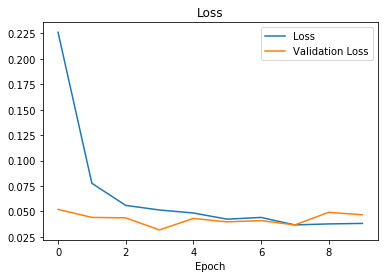

In [200]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

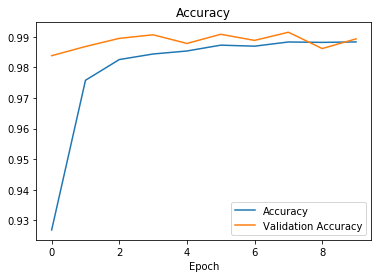

In [201]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')

In [202]:
# Load Image
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)

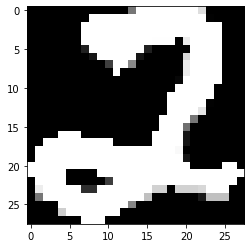

In [203]:
# Resize and Grayscale Image
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [204]:
# Normalize and Flatten Image
image = image/255
image = image.reshape(1,28,28,1)
print(image.shape)

(1, 28, 28, 1)


In [205]:
prediction = model.predict_classes(image)
print('Predicted Digit:', str(prediction))

Predicted Digit: [2]


In [206]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

Test Score: 0.048785497533737565
Test Accuracy: 0.9866999983787537
